<a href="https://colab.research.google.com/github/ucfilho/vichebling2810/blob/main/PH_suco/PH_suco_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
'''sequential significa que vai montar a rede neural etapa por etapa'''

from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
'''dentro do keras.layers estamos carregando dense, activation e etc.. para montar as 
camadas da rede neural'''

import numpy as np
'''O NumPy é uma biblioteca para a linguagem Python com funções 
para se trabalhar com computação numérica. Neste caso estamos 
chamando numpy de np para economizar tempo na digitação deste código'''

import pandas as pd
'''Pandas é um biblioteca para manipulação e análise de dados. 
Neste caso estamos chamando pandas de pd para economizar tempo 
na digitação deste código'''

import cv2
'''computer vision, biblioteca que trabalha com processamento de imagem'''

import random
'''Este módulo implementa geradores de números pseudoaleatórios para várias 
distribuições.'''

import zipfile
'''Este módulo fornece ferramentas para criar, ler, escrever, adicionar, 
e listar um arquivo ZIP.'''

from matplotlib import pyplot as plt
'''Matplotlib.pyplot serve para plotar gráficos, sendo que esta
biblioteca permite a personalização dos gráficos, tais como: tamanho
da figura, largura da linha, cor, estilo e etc...'''

from sklearn.svm import SVC
'''Uma máquina de vetores de suporte (SVM, do inglês: support vector machine) é 
um conceito na ciência da computação para um conjunto de métodos de aprendizado
 supervisionado que analisam os dados e reconhecem padrões, sendo usado neste 
 caso para fazer classificação (SVC, do inglês: Support Vector Classification)'''

from sklearn import preprocessing
'''o preprocessing é usado para fazer normatização os dados'''

from sklearn.model_selection import train_test_split
''' serve para separar os dados em treino e o teste'''

from sklearn.metrics import classification_report
'''serve para criar um relatório das métricas'''


'serve para criar um relatório das métricas'

In [2]:
#clonando os dados que estão na pasta ANN do github
!git clone https://github.com/victoriahebling/laranjas
%cd laranjas

fatal: destination path 'laranjas' already exists and is not an empty directory.
/content/laranjas


In [3]:
Arq =['PH_suco_0.zip','PH_suco_1.zip','PH_suco_2.zip']

img_name=[]
x_gray=[]
x_original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          img_name.append(name)

In [4]:
print(img_name)

['0 (1).png', '0 (2).png', '0 (3).png', '0 (4).png', '0 (5).png', '0 (6).png', '0 (7).png', '0 (8).png', '0 (9).png', '0 (10).png', '0 (11).png', '0 (12).png', '0 (13).png', '0 (14).png', '0 (15).png', '1 (1).png', '1 (2).png', '1 (3).png', '1 (4).png', '1 (5).png', '1 (6).png', '1 (7).png', '1 (8).png', '1 (9).png', '1 (10).png', '1 (11).png', '1 (12).png', '2 (1).png', '2 (2).png', '2 (3).png', '2 (4).png', '2 (5).png', '2 (6).png', '2 (7).png', '2 (8).png', '2 (9).png', '2 (10).png', '2 (11).png', '2 (12).png', '2 (13).png', '2 (14).png', '2 (15).png', '2 (16).png', '2 (17).png', '2 (18).png', '2 (19).png', '2 (20).png', '2 (21).png', '2 (22).png', '2 (23).png', '2 (24).png', '2 (25).png', '2 (26).png', '2 (27).png', '2 (28).png', '2 (29).png', '2 (30).png', '2 (31).png', '2 (32).png', '2 (33).png']


In [5]:
y_names = []
for yy in img_name:    
  '''para cada nome presente na lista img_name'''
  name = yy[0]
  '''extraindo as 3 primeiras letras de cada elemento yy'''
  y_names.append(name)  
  '''adicionando as letras extraídas anteriormente na lista y_names'''

In [6]:
unique_list = []    
'''lista em branco '''
for yy in y_names:  
  '''para cada elemento de y_name será rodado o ciclo de repetição abaixo'''
  if yy not in unique_list: 
    '''se o elemento não estiver na lista unique_list'''
    unique_list.append(yy)  
    '''adicionar o elemeneto yy na lista unique_list'''

In [7]:
print(unique_list)
'''printando as classes que foram obtidas a partir da extração das 3 primeiras
letras das imagens'''

['0', '1', '2']


'printando as classes que foram obtidas a partir da extração das 3 primeiras\nletras das imagens'

In [8]:
n = len(unique_list) 
'''len (do inglês: length) serve para pegar o tamannho da lista chamada unique_list'''
y = []    
'''criando uma lista vazia chamada y'''
for yy in y_names: 
  '''for irá percorrer cada elemento de y_names'''
  for i in range(n):
    '''for irá percorrer nos valores n'''
    if(yy == unique_list[i]):
      '''se o yy que esta em y_names for igual ao unique_list de y'''
      y.append(i)
      '''então será acrescentado i na lista y'''

In [9]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [10]:
DATASET_SIZE = len(y_names)
'''DATA_SIZE recebe o comprimento de y_names'''
Ind = range(DATASET_SIZE)
Img_Size = 80
'''Img_Size recebe 80'''
num_range = DATASET_SIZE

In [11]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)
'''separando o treino e o teste, sendo 20% dos dados para teste e 80% para treino
shuffle embaralha os dados'''

'separando o treino e o teste, sendo 20% dos dados para teste e 80% para treino\nshuffle embaralha os dados'

In [12]:
X_train = []  
'''X_train recebe lista em branco'''
Y_train = []  
'''Y_train recebe lista em branco'''
for II in Ind_train:
  '''for irá percorrer o Ind_train'''
  name = img_name[II]
  '''name recebe o img_name de II'''
  X_train.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  ''' a partir do módulo computer vision será feito o resize das imagens, ou seja, as imagens irão mudar sua resolução'''
  Y_train.append(y[II])
  '''os y[II] serão adicionados na lista Y_train'''

In [13]:
X_test= []  
'''X_test recebe lista em branco'''
Y_test = [] 
'''Y_test recebe lista em branco'''
i =0
for II in Ind_test:
  '''for irá percorrer o Ind_test'''
  name = img_name[II]
  '''name recebe o img_name de II'''
  X_test.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  '''a partir do módulo computer vision será feito o resize das imagens, ou seja, as imagens irão mudar sua resolução'''
  Y_test.append(y[II])

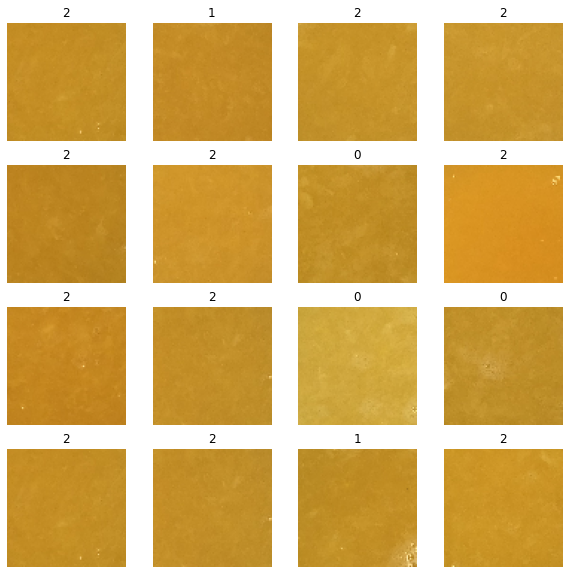

In [14]:
# mostrando as imagens do treino

num = len(Y_train)
'''num recebe o tamanho de Y_train'''
plt.figure(figsize=(10, 10))
'''plotando 10 polegadas de altura pro 10 polegadas de comprimento'''
for i in range(16): 
  '''i vai percorrer até 16'''
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_train[kk], cv2.COLOR_BGR2RGB)
  '''transformando a foto de BGR para RGB'''
  plt.imshow(RGB_img)
  '''mostrando a imagem'''
  plt.title(Y_train[kk])
  '''o titulo de cada imagem será o Y_train referente à imagem'''
  plt.axis("off")
  '''não plotar eixo'''

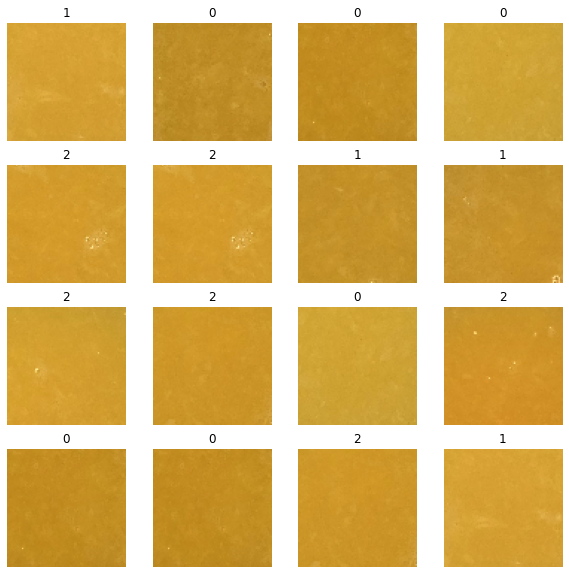

In [15]:
# mostrando as imagens do teste

num = len(Y_test)
'''num recebe o tamanho de Y_test'''
plt.figure(figsize=(10, 10))
'''plotando 10 polegadas de altura pro 10 polegadas de comprimento'''
for i in range(16):  
  '''i irá percorrer até 16'''
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_test[kk], cv2.COLOR_BGR2RGB)
  '''transformando a imagem BGR para RGB'''
  plt.imshow(RGB_img)
  '''mostrando a imagem'''
  plt.title(Y_test[kk])
  '''o titulo de cada imagem será o Y_test referente à cada foto'''
  plt.axis("off")
  '''não plotar eixos'''

In [16]:
X_new = []
'''criando uma lista vazia chamada X_new'''
for XX in X_train:
  '''para cada elemento XX de X_train'''
  X_new.append(XX)
  '''XX será acrescentado na lista X_nee'''
#print(XX)
'''printando XX'''
X_train = X_new.copy()
'''X_train recebe a cópia de X_new'''

X_new = []
'''criando uma lista vazia chamada X_new'''
for XX in X_test:
  '''para cada elemento XX de X_test'''
  X_new.append(XX)
  '''XX será acrescentado na lista X_new'''
X_test = X_new.copy()
'''X_test recebe a cópia de X_new'''

'X_test recebe a cópia de X_new'

In [17]:
def ynindicator(Y):
  '''criando uma função chamada de ynindicator que recebe como parâmetro Y'''
  N = len(Y)
  '''N recebe o comprimento de Y'''
  K = len(set(Y))
  '''K recebe o comprimento de set(Y)'''
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I
  '''a funçãi ynindicator irá retornar I'''

In [18]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))
X_train = X_train /255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = X_test /255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

In [19]:
X_train.shape

(48, 80, 80, 3)

In [20]:
# make the CNN
# N1, N2 = 100, 20 # Neuronios das camadas densas (duas camadas)
N1, N2 = 400, 200 # Neuronios das camadas densas (duas camadas)
F1, F2, F3 = 128, 256, 512 # filtros de convolucao
# F1, F2, F3 = 16, 32, 64 # filtros de convolucao
KERNEL = 3
N_EPOCHS = 30 # epocas de treino

model = Sequential()

model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=F1, kernel_size=(KERNEL, KERNEL)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=F2, kernel_size=(KERNEL, KERNEL)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=F3, kernel_size=(KERNEL, KERNEL)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
'''
r = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=15, batch_size=32)
print("Returned:", r)
'''

'\nr = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=15, batch_size=32)\nprint("Returned:", r)\n'

In [22]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=N_EPOCHS, batch_size=32)
print("Returned:", r)

Epoch 1/30
2/2 [==============================] - 7s 2s/step - loss: 11.5362 - accuracy: 0.2917 - val_loss: 2.8600 - val_accuracy: 0.2500
Epoch 2/30
2/2 [==============================] - 6s 2s/step - loss: 18.1060 - accuracy: 0.3333 - val_loss: 2.3831 - val_accuracy: 0.2500
Epoch 3/30
2/2 [==============================] - 6s 2s/step - loss: 5.8514 - accuracy: 0.6458 - val_loss: 12.1152 - val_accuracy: 0.2500
Epoch 4/30
2/2 [==============================] - 6s 2s/step - loss: 4.9857 - accuracy: 0.3958 - val_loss: 19.1478 - val_accuracy: 0.2500
Epoch 5/30
2/2 [==============================] - 6s 2s/step - loss: 3.1295 - accuracy: 0.6042 - val_loss: 16.3852 - val_accuracy: 0.2500
Epoch 6/30
2/2 [==============================] - 6s 2s/step - loss: 2.7064 - accuracy: 0.7292 - val_loss: 9.2670 - val_accuracy: 0.5000
Epoch 7/30
2/2 [==============================] - 6s 2s/step - loss: 4.6991 - accuracy: 0.7083 - val_loss: 11.5869 - val_accuracy: 0.5000
Epoch 8/30
2/2 [===================

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 128)       3584      
                                                                 
 batch_normalization (BatchN  (None, 78, 78, 128)      512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 78, 78, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 256)       295168    
                                                                 
 batch_normalization_1 (Batc  (None, 37, 37, 256)      1

In [24]:
Img_Size

80

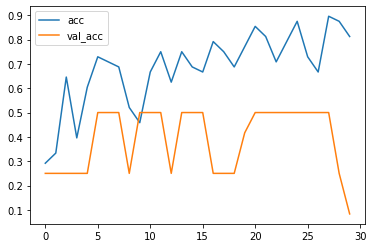

In [25]:

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


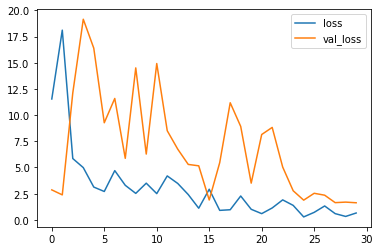

In [26]:

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
